In [92]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as pp
import datetime as dt
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sbn

## Read CSV File

In [93]:
df = pd.read_csv('../exports/online_retail_cleaningdata.csv')

In [94]:
df.head()

,Unnamed: 0,invoice_id,item_id,description,quantity,date,unit_price,sales,customer_id,country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,15.30,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,20.34,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,22.00,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,20.34,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,20.34,17850.0,United Kingdom


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390294 entries, 0 to 390293
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   390294 non-null  int64  
 1   invoice_id   390294 non-null  int64  
 2   item_id      390294 non-null  object 
 3   description  390294 non-null  object 
 4   quantity     390294 non-null  int64  
 5   date         390294 non-null  object 
 6   unit_price   390294 non-null  float64
 7   sales        390294 non-null  float64
 8   customer_id  390294 non-null  float64
 9   country      390294 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 29.8+ MB


In [96]:
df['date'] = pd.to_datetime(df['date'])

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390294 entries, 0 to 390293
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   390294 non-null  int64         
 1   invoice_id   390294 non-null  int64         
 2   item_id      390294 non-null  object        
 3   description  390294 non-null  object        
 4   quantity     390294 non-null  int64         
 5   date         390294 non-null  datetime64[ns]
 6   unit_price   390294 non-null  float64       
 7   sales        390294 non-null  float64       
 8   customer_id  390294 non-null  float64       
 9   country      390294 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 29.8+ MB


In [98]:
last_date = df['date'].max()
last_date

Timestamp('2011-12-09 00:00:00')

In [99]:
first_date = df['date'].min()
first_date

Timestamp('2010-12-01 00:00:00')

In [100]:
three_months_ago = last_date - pd.DateOffset(months=3)
three_months_ago

Timestamp('2011-09-09 00:00:00')

In [101]:
df_last_3month = df[df['date'] >= three_months_ago]
df_last_3month

,Unnamed: 0,invoice_id,item_id,description,quantity,date,unit_price,sales,customer_id,country
230318,332447,566074,22624,IVORY KITCHEN SCALES,2,2011-09-09,8.50,17.00,12535.0,France
230319,332448,566074,22138,BAKING SET 9 PIECE RETROSPOT,6,2011-09-09,4.95,29.70,12535.0,France
230320,332449,566074,90184C,BLACK CHUNKY BEAD BRACELET W STRAP,4,2011-09-09,8.95,35.80,12535.0,France
230321,332450,566074,21155,RED RETROSPOT PEG BAG,12,2011-09-09,2.55,30.60,12535.0,France
230322,332451,566074,22558,CLOTHES PEGS RETROSPOT PACK 24,12,2011-09-09,1.65,19.80,12535.0,France
...,...,...,...,...,...,...,...,...,...,...
390289,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,10.20,12680.0,France
390290,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12.60,12680.0,France
390291,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,16.60,12680.0,France
390292,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,16.60,12680.0,France


In [102]:
rfm_last_3month = (df_last_3month.groupby('customer_id').agg(
                                        recency = ('date' , lambda x: (last_date - x.max()).days),
                                        frequency = ('invoice_id' , 'nunique'),
                                        monetary = ('sales' , 'sum')).reset_index())

In [103]:
rfm_last_3month

,customer_id,recency,frequency,monetary
0,12347.0,2,2,1519.14
1,12348.0,75,1,270.00
2,12349.0,18,1,1353.80
3,12352.0,36,3,744.23
4,12356.0,22,1,58.35
...,...,...,...,...
2862,18277.0,58,1,110.38
2863,18278.0,73,1,173.90
2864,18282.0,7,1,77.84
2865,18283.0,3,6,958.26


## **CLV = AOV * Purchase Frequency * Customer Lifespan**


**AOV (Average Order Value)**


In [104]:
rfm_last_3month['aov'] = (rfm_last_3month['monetary'] / rfm_last_3month['frequency']).clip(lower=1)
rfm_last_3month

,customer_id,recency,frequency,monetary,aov
0,12347.0,2,2,1519.14,759.570000
1,12348.0,75,1,270.00,270.000000
2,12349.0,18,1,1353.80,1353.800000
3,12352.0,36,3,744.23,248.076667
4,12356.0,22,1,58.35,58.350000
...,...,...,...,...,...
2862,18277.0,58,1,110.38,110.380000
2863,18278.0,73,1,173.90,173.900000
2864,18282.0,7,1,77.84,77.840000
2865,18283.0,3,6,958.26,159.710000


In [105]:
rfm_last_3month['purchase_freq'] = rfm_last_3month['frequency']
rfm_last_3month

,customer_id,recency,frequency,monetary,aov,purchase_freq
0,12347.0,2,2,1519.14,759.570000,2
1,12348.0,75,1,270.00,270.000000,1
2,12349.0,18,1,1353.80,1353.800000,1
3,12352.0,36,3,744.23,248.076667,3
4,12356.0,22,1,58.35,58.350000,1
...,...,...,...,...,...,...
2862,18277.0,58,1,110.38,110.380000,1
2863,18278.0,73,1,173.90,173.900000,1
2864,18282.0,7,1,77.84,77.840000,1
2865,18283.0,3,6,958.26,159.710000,6


## Lifespan per Months

In [106]:
rfm_last_3month['lifespn_per_month'] = (rfm_last_3month['recency'] / 30).clip(lower=1)
rfm_last_3month

,customer_id,recency,frequency,monetary,aov,purchase_freq,lifespn_per_month
0,12347.0,2,2,1519.14,759.570000,2,1.000000
1,12348.0,75,1,270.00,270.000000,1,2.500000
2,12349.0,18,1,1353.80,1353.800000,1,1.000000
3,12352.0,36,3,744.23,248.076667,3,1.200000
4,12356.0,22,1,58.35,58.350000,1,1.000000
...,...,...,...,...,...,...,...
2862,18277.0,58,1,110.38,110.380000,1,1.933333
2863,18278.0,73,1,173.90,173.900000,1,2.433333
2864,18282.0,7,1,77.84,77.840000,1,1.000000
2865,18283.0,3,6,958.26,159.710000,6,1.000000


## Lifespan = The Mean of All Recencies

In [107]:
avg_recency = rfm_last_3month['recency'].mean()

In [108]:
avg_lifespn = avg_recency / 30

In [109]:
rfm_last_3month['lifespn_avg'] = avg_lifespn
rfm_last_3month

,customer_id,recency,frequency,monetary,aov,purchase_freq,lifespn_per_month,lifespn_avg
0,12347.0,2,2,1519.14,759.570000,2,1.000000,1.050227
1,12348.0,75,1,270.00,270.000000,1,2.500000,1.050227
2,12349.0,18,1,1353.80,1353.800000,1,1.000000,1.050227
3,12352.0,36,3,744.23,248.076667,3,1.200000,1.050227
4,12356.0,22,1,58.35,58.350000,1,1.000000,1.050227
...,...,...,...,...,...,...,...,...
2862,18277.0,58,1,110.38,110.380000,1,1.933333,1.050227
2863,18278.0,73,1,173.90,173.900000,1,2.433333,1.050227
2864,18282.0,7,1,77.84,77.840000,1,1.000000,1.050227
2865,18283.0,3,6,958.26,159.710000,6,1.000000,1.050227


In [110]:
rfm_last_3month['clv_lifesp_m'] = (
                            rfm_last_3month['aov'] *
                            rfm_last_3month['purchase_freq']*
                            rfm_last_3month['lifespn_per_month']
)

In [111]:
rfm_last_3month['clv_lifesp_avg'] = (
                            rfm_last_3month['aov'] *
                            rfm_last_3month['purchase_freq']*
                            rfm_last_3month['lifespn_avg']
)

In [112]:
rfm_last_3month

,customer_id,recency,frequency,monetary,aov,purchase_freq,lifespn_per_month,lifespn_avg,clv_lifesp_m,clv_lifesp_avg
0,12347.0,2,2,1519.14,759.570000,2,1.000000,1.050227,1519.140000,1595.441416
1,12348.0,75,1,270.00,270.000000,1,2.500000,1.050227,675.000000,283.561214
2,12349.0,18,1,1353.80,1353.800000,1,1.000000,1.050227,1353.800000,1421.796931
3,12352.0,36,3,744.23,248.076667,3,1.200000,1.050227,893.076000,781.610230
4,12356.0,22,1,58.35,58.350000,1,1.000000,1.050227,58.350000,61.280729
...,...,...,...,...,...,...,...,...,...,...
2862,18277.0,58,1,110.38,110.380000,1,1.933333,1.050227,213.401333,115.924025
2863,18278.0,73,1,173.90,173.900000,1,2.433333,1.050227,423.156667,182.634426
2864,18282.0,7,1,77.84,77.840000,1,1.000000,1.050227,77.840000,81.749648
2865,18283.0,3,6,958.26,159.710000,6,1.000000,1.050227,958.260000,1006.390255


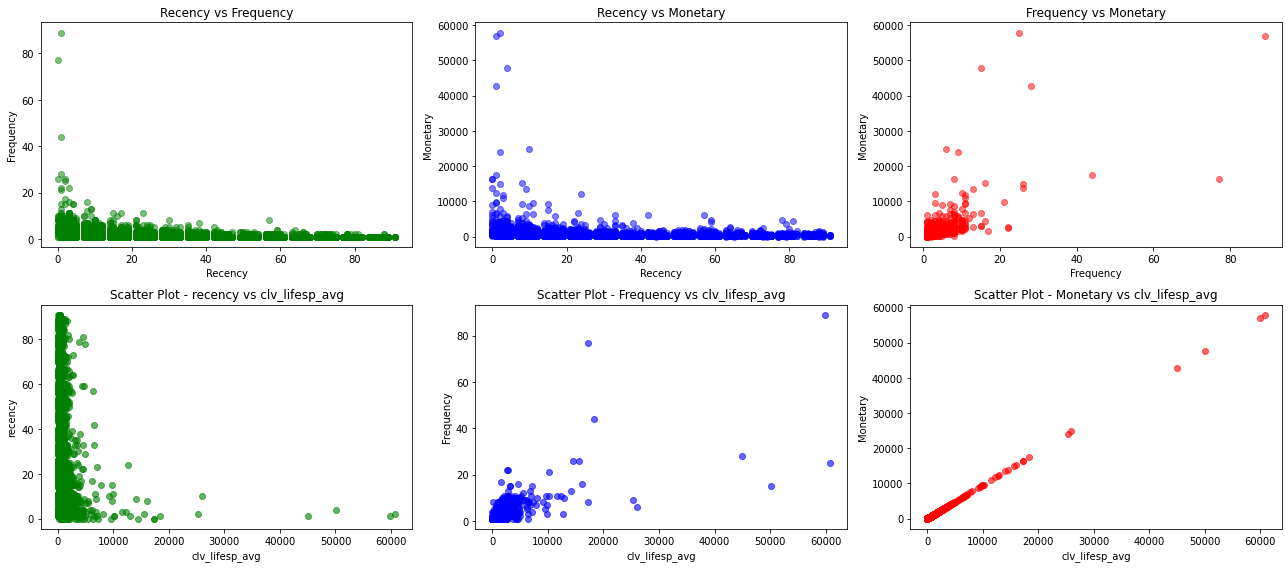

In [117]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(rfm_last_3month['recency'], rfm_last_3month['frequency'], color='green', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(rfm_last_3month['recency'], rfm_last_3month['monetary'], color='blue', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(rfm_last_3month['frequency'], rfm_last_3month['monetary'], color='red', alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_lifesp_avg
plt.subplot(2, 3, 4)
plt.scatter(rfm_last_3month['clv_lifesp_avg'], rfm_last_3month['recency'], color='green', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('recency')
plt.title('Scatter Plot - recency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 5)
plt.scatter(rfm_last_3month['clv_lifesp_avg'], rfm_last_3month['frequency'], color='blue', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Frequency')
plt.title('Scatter Plot - Frequency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 6)
plt.scatter(rfm_last_3month['clv_lifesp_avg'], rfm_last_3month['monetary'], color='red', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Monetary')
plt.title('Scatter Plot - Monetary vs clv_lifesp_avg')



plt.tight_layout()
plt.show()


## Normalization,Standardization

In [118]:
relevant_cols = ['recency' , 'frequency' , 'monetary' , 'clv_lifesp_m' , 'clv_lifesp_avg']

In [119]:
rfm_clv = rfm_last_3month[relevant_cols]
rfm_clv.head()

,recency,frequency,monetary,clv_lifesp_m,clv_lifesp_avg
0,2,2,1519.14,1519.140,1595.441416
1,75,1,270.00,675.000,283.561214
2,18,1,1353.80,1353.800,1421.796931
3,36,3,744.23,893.076,781.610230
4,22,1,58.35,58.350,61.280729


### MinMax Normalization

In [120]:
scaler1 = pp.MinMaxScaler()
minmax_sclr = scaler1.fit_transform(rfm_clv)

In [121]:
minmax_sclr

array([[0.02197802, 0.01136364, 0.02623749, 0.02619602, 0.02622069],
       [0.82417582, 0.        , 0.00466323, 0.01161601, 0.00464606],
       [0.1978022 , 0.        , 0.02338185, 0.02334026, 0.023365  ],
       ...,
       [0.07692308, 0.        , 0.00134438, 0.00130185, 0.00132715],
       [0.03296703, 0.05681818, 0.01655037, 0.01650849, 0.0165334 ],
       [0.46153846, 0.01136364, 0.0185148 , 0.02587925, 0.01849787]])

In [122]:
# Array to DataFrame

minmax_df = pd.DataFrame(minmax_sclr, columns=relevant_cols)
minmax_df.head()

,recency,frequency,monetary,clv_lifesp_m,clv_lifesp_avg
0,0.021978,0.011364,0.026237,0.026196,0.026221
1,0.824176,0.000000,0.004663,0.011616,0.004646
2,0.197802,0.000000,0.023382,0.023340,0.023365
3,0.395604,0.022727,0.012854,0.015383,0.012837
4,0.241758,0.000000,0.001008,0.000965,0.000991


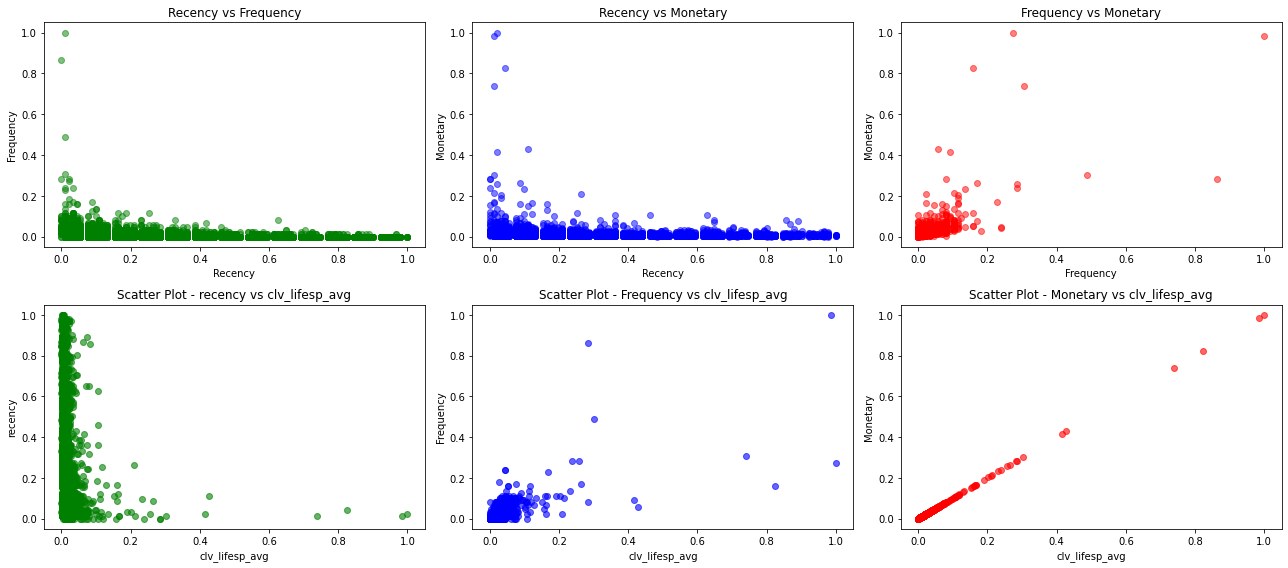

In [123]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(minmax_df['recency'], minmax_df['frequency'], color='green', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(minmax_df['recency'], minmax_df['monetary'], color='blue', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(minmax_df['frequency'], minmax_df['monetary'], color='red', alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_lifesp_avg
plt.subplot(2, 3, 4)
plt.scatter(minmax_df['clv_lifesp_avg'], minmax_df['recency'], color='green', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('recency')
plt.title('Scatter Plot - recency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 5)
plt.scatter(minmax_df['clv_lifesp_avg'], minmax_df['frequency'], color='blue', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Frequency')
plt.title('Scatter Plot - Frequency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 6)
plt.scatter(minmax_df['clv_lifesp_avg'], minmax_df['monetary'], color='red', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Monetary')
plt.title('Scatter Plot - Monetary vs clv_lifesp_avg')



plt.tight_layout()
plt.show()


### Standard Normalization

In [124]:
scaler2 = pp.StandardScaler()
std_sclr = scaler2.fit_transform(rfm_clv)

In [125]:
std_sclr

array([[-1.18681418, -0.08571752,  0.24814933,  0.16932   ,  0.24814919],
       [ 1.74937106, -0.40322675, -0.27697195, -0.17780761, -0.27697211],
       [-0.54326673, -0.40322675,  0.17864266,  0.10132881,  0.17864253],
       ...,
       [-0.9857056 , -0.40322675, -0.35775337, -0.423372  , -0.35775354],
       [-1.14659246,  1.18431938,  0.01236309, -0.06132531,  0.01236294],
       [ 0.42205444, -0.08571752,  0.06017782,  0.16177822,  0.06017768]])

In [126]:
# Array to DataFrame

std_df = pd.DataFrame(std_sclr , columns=relevant_cols)
std_df.head()

,recency,frequency,monetary,clv_lifesp_m,clv_lifesp_avg
0,-1.186814,-0.085718,0.248149,0.169320,0.248149
1,1.749371,-0.403227,-0.276972,-0.177808,-0.276972
2,-0.543267,-0.403227,0.178643,0.101329,0.178643
3,0.180724,0.231792,-0.077612,-0.088130,-0.077612
4,-0.382380,-0.403227,-0.365947,-0.431387,-0.365947


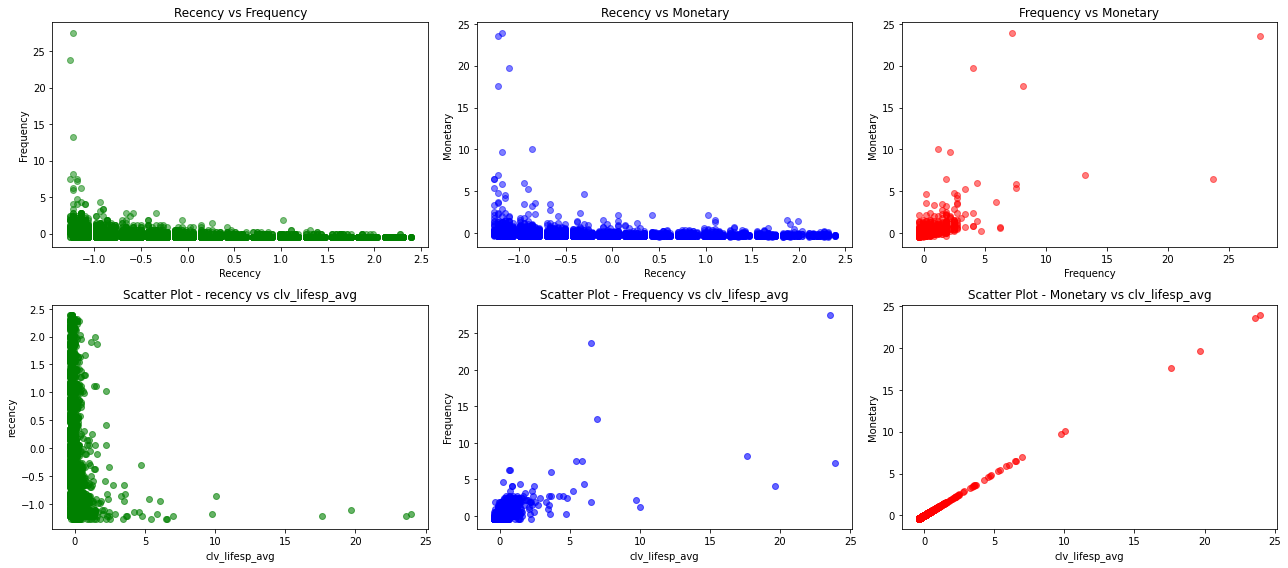

In [127]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(std_df['recency'], std_df['frequency'], color='green', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(std_df['recency'], std_df['monetary'], color='blue', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(std_df['frequency'], std_df['monetary'], color='red', alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_lifesp_avg
plt.subplot(2, 3, 4)
plt.scatter(std_df['clv_lifesp_avg'], std_df['recency'], color='green', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('recency')
plt.title('Scatter Plot - recency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 5)
plt.scatter(std_df['clv_lifesp_avg'], std_df['frequency'], color='blue', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Frequency')
plt.title('Scatter Plot - Frequency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 6)
plt.scatter(std_df['clv_lifesp_avg'], std_df['monetary'], color='red', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Monetary')
plt.title('Scatter Plot - Monetary vs clv_lifesp_avg')



plt.tight_layout()
plt.show()



### Robust Normalization

In [128]:
scaler3 = pp.RobustScaler()
robust_sclr = scaler3.fit_transform(rfm_clv)

In [129]:
robust_sclr

array([[-0.575     ,  0.5       ,  1.45109109,  1.00336818,  1.45109109],
       [ 1.25      ,  0.        , -0.29010113,  0.02938764, -0.29010113],
       [-0.175     ,  0.        ,  1.22062155,  0.81259657,  1.22062155],
       ...,
       [-0.45      ,  0.        , -0.55795541, -0.65962391, -0.55795541],
       [-0.55      ,  2.5       ,  0.66927328,  0.35621699,  0.66927328],
       [ 0.425     ,  0.5       ,  0.82781692,  0.98220723,  0.82781692]])

In [130]:
# Array to DataFrame

robust_df = pd.DataFrame(robust_sclr , columns=relevant_cols)
robust_df.head()

,recency,frequency,monetary,clv_lifesp_m,clv_lifesp_avg
0,-0.575,0.5,1.451091,1.003368,1.451091
1,1.250,0.0,-0.290101,0.029388,-0.290101
2,-0.175,0.0,1.220622,0.812597,1.220622
3,0.275,1.0,0.370934,0.281007,0.370934
4,-0.075,0.0,-0.585123,-0.682112,-0.585123


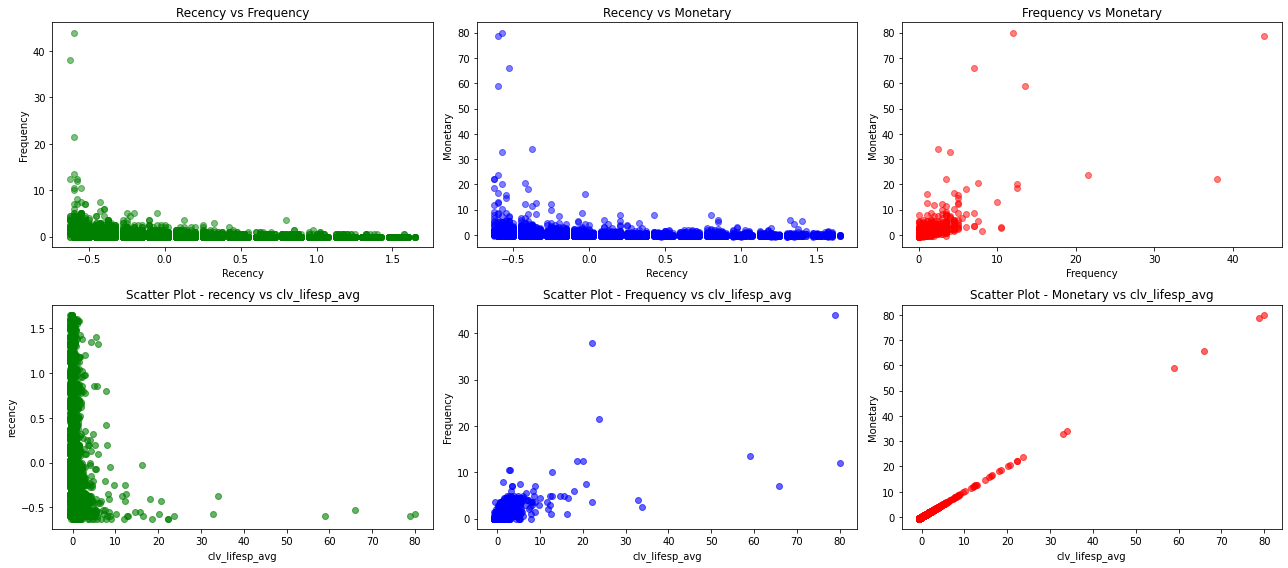

In [131]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(robust_df['recency'], robust_df['frequency'], color='green', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(robust_df['recency'], robust_df['monetary'], color='blue', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(robust_df['frequency'], robust_df['monetary'], color='red', alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_lifesp_avg
plt.subplot(2, 3, 4)
plt.scatter(robust_df['clv_lifesp_avg'], robust_df['recency'], color='green', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('recency')
plt.title('Scatter Plot - recency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 5)
plt.scatter(robust_df['clv_lifesp_avg'], robust_df['frequency'], color='blue', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Frequency')
plt.title('Scatter Plot - Frequency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 6)
plt.scatter(robust_df['clv_lifesp_avg'], robust_df['monetary'], color='red', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Monetary')
plt.title('Scatter Plot - Monetary vs clv_lifesp_avg')



plt.tight_layout()
plt.show()



## Clustering - KMeans - ElbowPlot

In [132]:
def find_best_clusters(df, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)


    return clusters_centers, k_values


In [133]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()


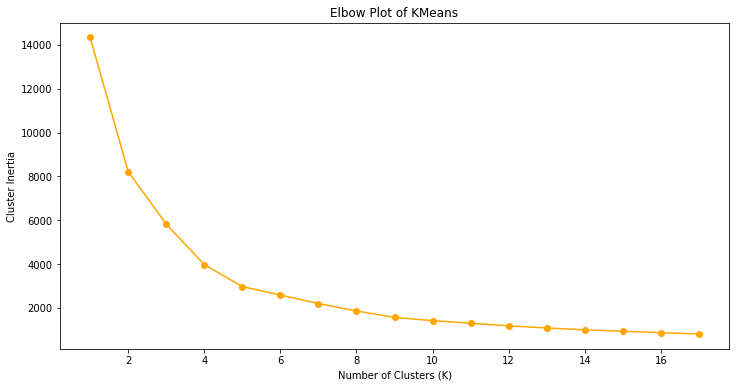

In [134]:
clusters_centers, k_values = find_best_clusters(std_sclr, 18)

generate_elbow_plot(clusters_centers, k_values)


In [135]:
kmeans_model = KMeans(n_clusters = 5)
kmeans_model.fit(std_sclr)

KMeans(n_clusters=5)

In [136]:
std_df["clusters"] = kmeans_model.labels_
std_df.head()

,recency,frequency,monetary,clv_lifesp_m,clv_lifesp_avg,clusters
0,-1.186814,-0.085718,0.248149,0.169320,0.248149,1
1,1.749371,-0.403227,-0.276972,-0.177808,-0.276972,3
2,-0.543267,-0.403227,0.178643,0.101329,0.178643,1
3,0.180724,0.231792,-0.077612,-0.088130,-0.077612,1
4,-0.382380,-0.403227,-0.365947,-0.431387,-0.365947,1


In [138]:
rfm_last_3month['clusters'] = kmeans_model.labels_
rfm_last_3month

,customer_id,recency,frequency,monetary,aov,purchase_freq,lifespn_per_month,lifespn_avg,clv_lifesp_m,clv_lifesp_avg,clusters
0,12347.0,2,2,1519.14,759.570000,2,1.000000,1.050227,1519.140000,1595.441416,1
1,12348.0,75,1,270.00,270.000000,1,2.500000,1.050227,675.000000,283.561214,3
2,12349.0,18,1,1353.80,1353.800000,1,1.000000,1.050227,1353.800000,1421.796931,1
3,12352.0,36,3,744.23,248.076667,3,1.200000,1.050227,893.076000,781.610230,1
4,12356.0,22,1,58.35,58.350000,1,1.000000,1.050227,58.350000,61.280729,1
...,...,...,...,...,...,...,...,...,...,...,...
2862,18277.0,58,1,110.38,110.380000,1,1.933333,1.050227,213.401333,115.924025,3
2863,18278.0,73,1,173.90,173.900000,1,2.433333,1.050227,423.156667,182.634426,3
2864,18282.0,7,1,77.84,77.840000,1,1.000000,1.050227,77.840000,81.749648,1
2865,18283.0,3,6,958.26,159.710000,6,1.000000,1.050227,958.260000,1006.390255,1


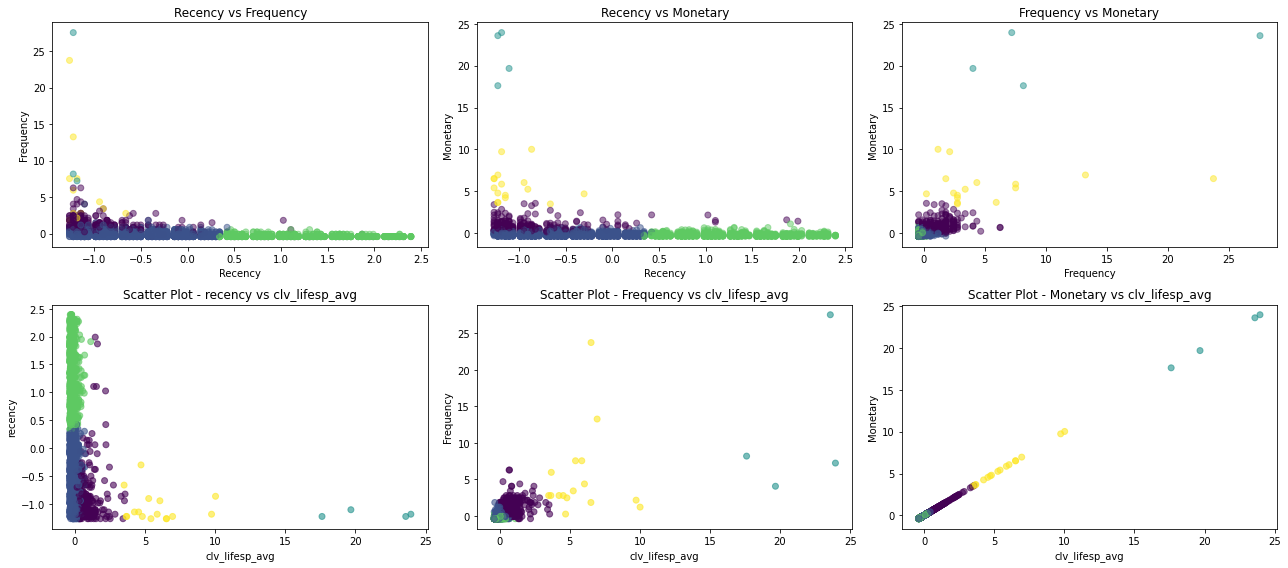

In [139]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(std_df['recency'], std_df['frequency'],c = std_df['clusters'] , alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(std_df['recency'], std_df['monetary'], c = std_df['clusters'], alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(std_df['frequency'], std_df['monetary'], c = std_df['clusters'], alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_lifesp_avg
plt.subplot(2, 3, 4)
plt.scatter(std_df['clv_lifesp_avg'], std_df['recency'], c = std_df['clusters'] , alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('recency')
plt.title('Scatter Plot - recency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 5)
plt.scatter(std_df['clv_lifesp_avg'], std_df['frequency'], c = std_df['clusters'] , alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Frequency')
plt.title('Scatter Plot - Frequency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 6)
plt.scatter(std_df['clv_lifesp_avg'], std_df['monetary'], c = std_df['clusters'] , alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Monetary')
plt.title('Scatter Plot - Monetary vs clv_lifesp_avg')



plt.tight_layout()
plt.show()



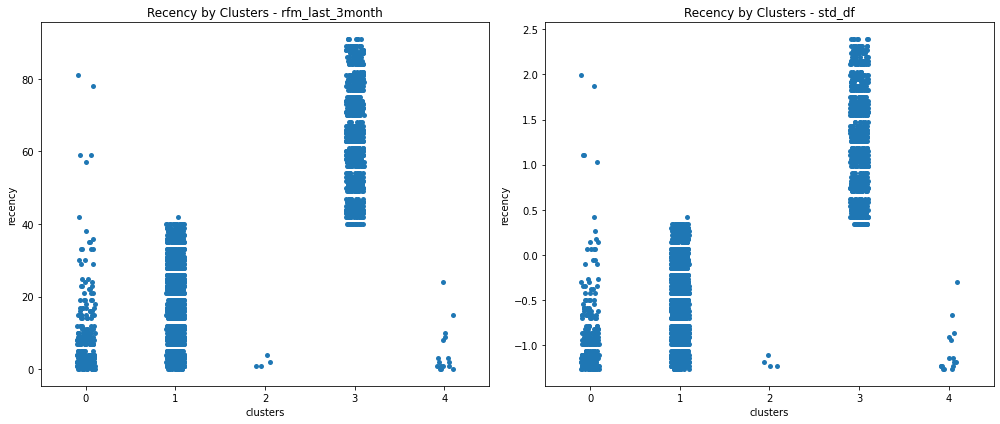

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))  # 1 ردیف، 2 ستون

sbn.stripplot(x='clusters', y='recency' , data = rfm_last_3month ,  ax=axes[0])
axes[0].set_title("Recency by Clusters - rfm_last_3month")


sbn.stripplot(x='clusters', y='recency' , data = std_df ,  ax=axes[1])
axes[1].set_title("Recency by Clusters - std_df")


plt.tight_layout()
plt.show()


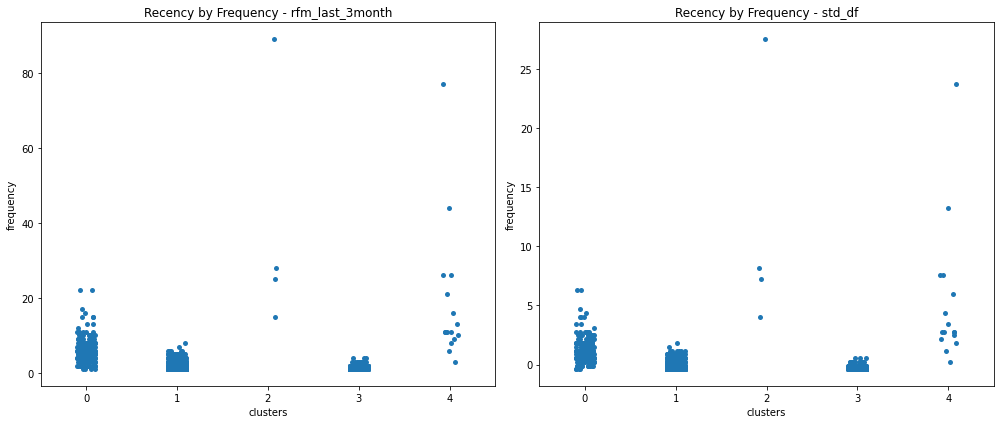

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))  # 1 ردیف، 2 ستون

sbn.stripplot(x='clusters', y='frequency' , data = rfm_last_3month ,  ax=axes[0])
axes[0].set_title("Recency by Frequency - rfm_last_3month")


sbn.stripplot(x='clusters', y='frequency' , data = std_df ,  ax=axes[1])
axes[1].set_title("Recency by Frequency - std_df")


plt.tight_layout()
plt.show()


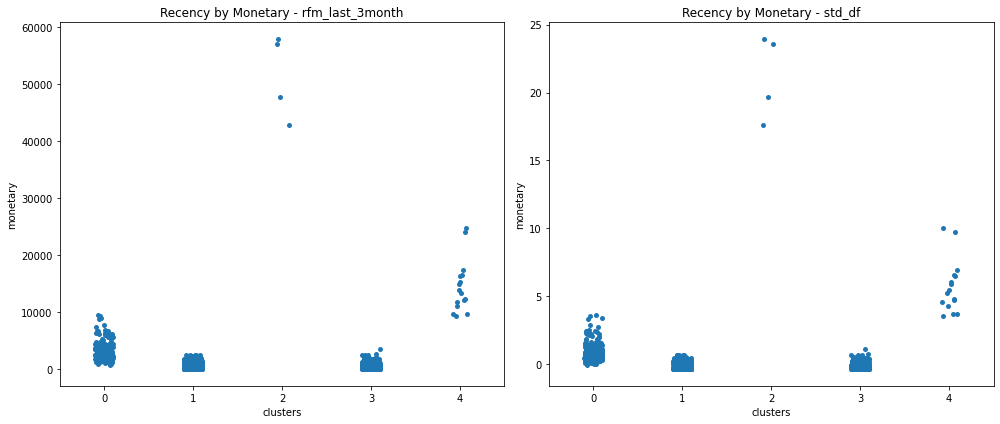

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))  # 1 ردیف، 2 ستون

sbn.stripplot(x='clusters', y='monetary' , data = rfm_last_3month ,  ax=axes[0])
axes[0].set_title("Recency by Monetary - rfm_last_3month")


sbn.stripplot(x='clusters', y='monetary' , data = std_df ,  ax=axes[1])
axes[1].set_title("Recency by Monetary - std_df")


plt.tight_layout()
plt.show()


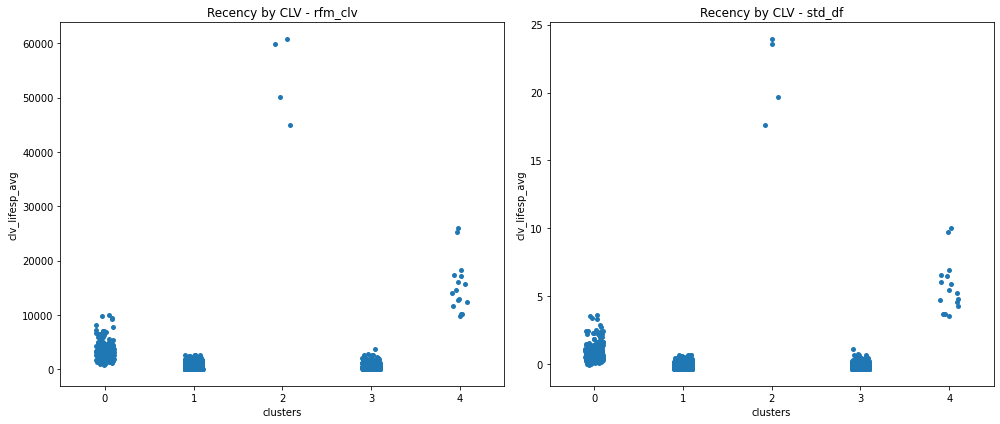

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))  # 1 ردیف، 2 ستون

sbn.stripplot(x='clusters', y='clv_lifesp_avg' , data = rfm_last_3month ,  ax=axes[0])
axes[0].set_title("Recency by CLV - rfm_clv")


sbn.stripplot(x='clusters', y='clv_lifesp_avg' , data = std_df ,  ax=axes[1])
axes[1].set_title("Recency by CLV - std_df")


plt.tight_layout()
plt.show()


In [145]:
std_df['customer_id'] = rfm_last_3month['customer_id'].values
std_df.head()

,recency,frequency,monetary,clv_lifesp_m,clv_lifesp_avg,clusters,customer_id
0,-1.186814,-0.085718,0.248149,0.169320,0.248149,1,12347.0
1,1.749371,-0.403227,-0.276972,-0.177808,-0.276972,3,12348.0
2,-0.543267,-0.403227,0.178643,0.101329,0.178643,1,12349.0
3,0.180724,0.231792,-0.077612,-0.088130,-0.077612,1,12352.0
4,-0.382380,-0.403227,-0.365947,-0.431387,-0.365947,1,12356.0


In [146]:
clusters_mean = std_df.groupby('clusters').agg(
                                                avg_recency = ('recency' , 'mean'),
                                                avg_frequency = ('frequency','mean'),
                                                avg_monetary = ('monetary','mean'),
                                                avg_clv_lifesp_m = ('clv_lifesp_m','mean'),
                                                avg_clv_lifesp_avg = ('clv_lifesp_avg','mean'),
                                                customers_count = ('customer_id' , 'count')

).reset_index()

In [147]:
clusters_mean

,clusters,avg_recency,avg_frequency,avg_monetary,avg_clv_lifesp_m,avg_clv_lifesp_avg,customers_count
0,0,-0.902283,1.252525,0.857115,0.819166,0.857115,270
1,1,-0.545341,-0.088800,-0.135579,-0.200286,-0.135580,1648
2,2,-1.186814,11.741501,21.205712,20.669938,21.205713,4
3,3,1.253116,-0.348201,-0.198376,-0.066842,-0.198376,929
4,4,-1.066149,5.292095,5.717657,5.519574,5.717657,16


In [85]:
#rfm_clv.to_excel('../exports/rfm_clv_3month_realdata.xlsx')

In [86]:
#rfm_clv.to_csv('../exports/rfm_clv_3month_realdata.csv')

In [148]:
std_df.to_csv('../exports/rfm_clv_normalized_kmeans_3month.csv')

In [149]:
std_df.to_excel('../exports/rfm_clv_normalized_kmeans_3month.xlsx')

In [150]:
clusters_mean.to_csv('../exports/rfm_clv_3month_mean.csv')

In [151]:
clusters_mean.to_excel('../exports/rfm_clv_3month_mean.xlsx')

In [152]:
rfm_last_3month.to_csv('../exports/rfm_clv_3month_realdata.csv')

In [153]:
rfm_last_3month.to_excel('../exports/rfm_clv_3month_realdata.xlsx')